In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file
df = pd.read_csv("Automobile_insurance_fraud.csv")
df


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


The dataset contains both categorical and numerical columns.Here "fraud_reported" is our target column, Since it has two categories, it is a "classification problem" and we need to predict if an insurance claim is fraudulent or not.

# Exploratory Data Analysis(EDA)

In [3]:
# Checking the dimension of dataset
df.shape


(1000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Here the column_c39 has 0 non null values which means it has one unique value throughout the data so we can drop this column.

In [12]:

# Droping unnecessary columns
df.drop(['incident_location','insured_zip','policy_number'],axis=1,inplace=True)

In [7]:
df.isin(['?']).sum().any()

True

In [8]:
#Let replace '?' with np.NaN

df=df.replace('?',np.NaN)

In [9]:
# Checking null values
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [14]:
#Missing value imputation
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [15]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


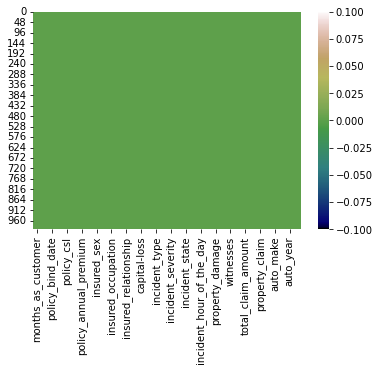

In [16]:
# Heatmap of missing value
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()

Finally, No Missing Value is Present.

In [17]:
# Checking the type of dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries          

In [18]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


1000    351
500     342
2000    3

In [19]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [20]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [21]:
# Dropping policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [22]:
# Incident year for all data is 2015 so we gone drop it.
df.drop(['incident_year'],axis=1,inplace=True)

In [23]:
# Checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)
print("\n")

Categorical columns are:
 ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical columns are:
 ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month']




In [24]:
# Cehcking the list of counts of target
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

From the value counts we can notice that the data is not balanced. So we can use ovesampling method to balance the data before building the models.

In [25]:
# statistical summary of numerical columns
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,...,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,15.448000,6.559000,2001.604000,13.08400,3.407000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,...,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,8.850176,3.391758,7.360391,10.44318,3.276291
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,...,100.00000,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000,1.00000,1.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,...,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,8.000000,4.000000,1995.000000,2.00000,1.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,...,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,16.000000,7.000000,2002.000000,15.00000,2.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,...,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,23.000000,9.000000,2008.000000,22.00000,5.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,...,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,31.000000,12.000000,2015.000000,31.00000,12.000000


From the above description we can observe the following things.

Here the counts of all the columns are equal which means there are no missing values in the dataset.

In some of the columns like policy_deductable, capital-gains, injury_claim etc we can observe the mean value is greater than the median(50%) which means the data in those columns are skewed to right.

And in some of the columns like total_claim_amount, vehicle_claim...etc we can observe the median is greater than the mean which means the data in the columns are skewed to left.

And some of the columns have equal mean and median that means the data symmetric and is normally distributed and no skewness present.

There is a huge difference in 75% and max it shows that huge outliers present in the columns.

# Data Visualization

N    753
Y    247
Name: fraud_reported, dtype: int64


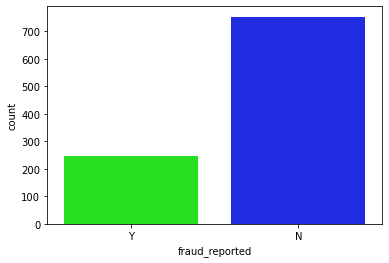

In [26]:
# Visualizing how many insurance claims is fraudulent
print(df['fraud_reported'].value_counts())
sns.countplot(df['fraud_reported'],palette='hsv')
plt.show()

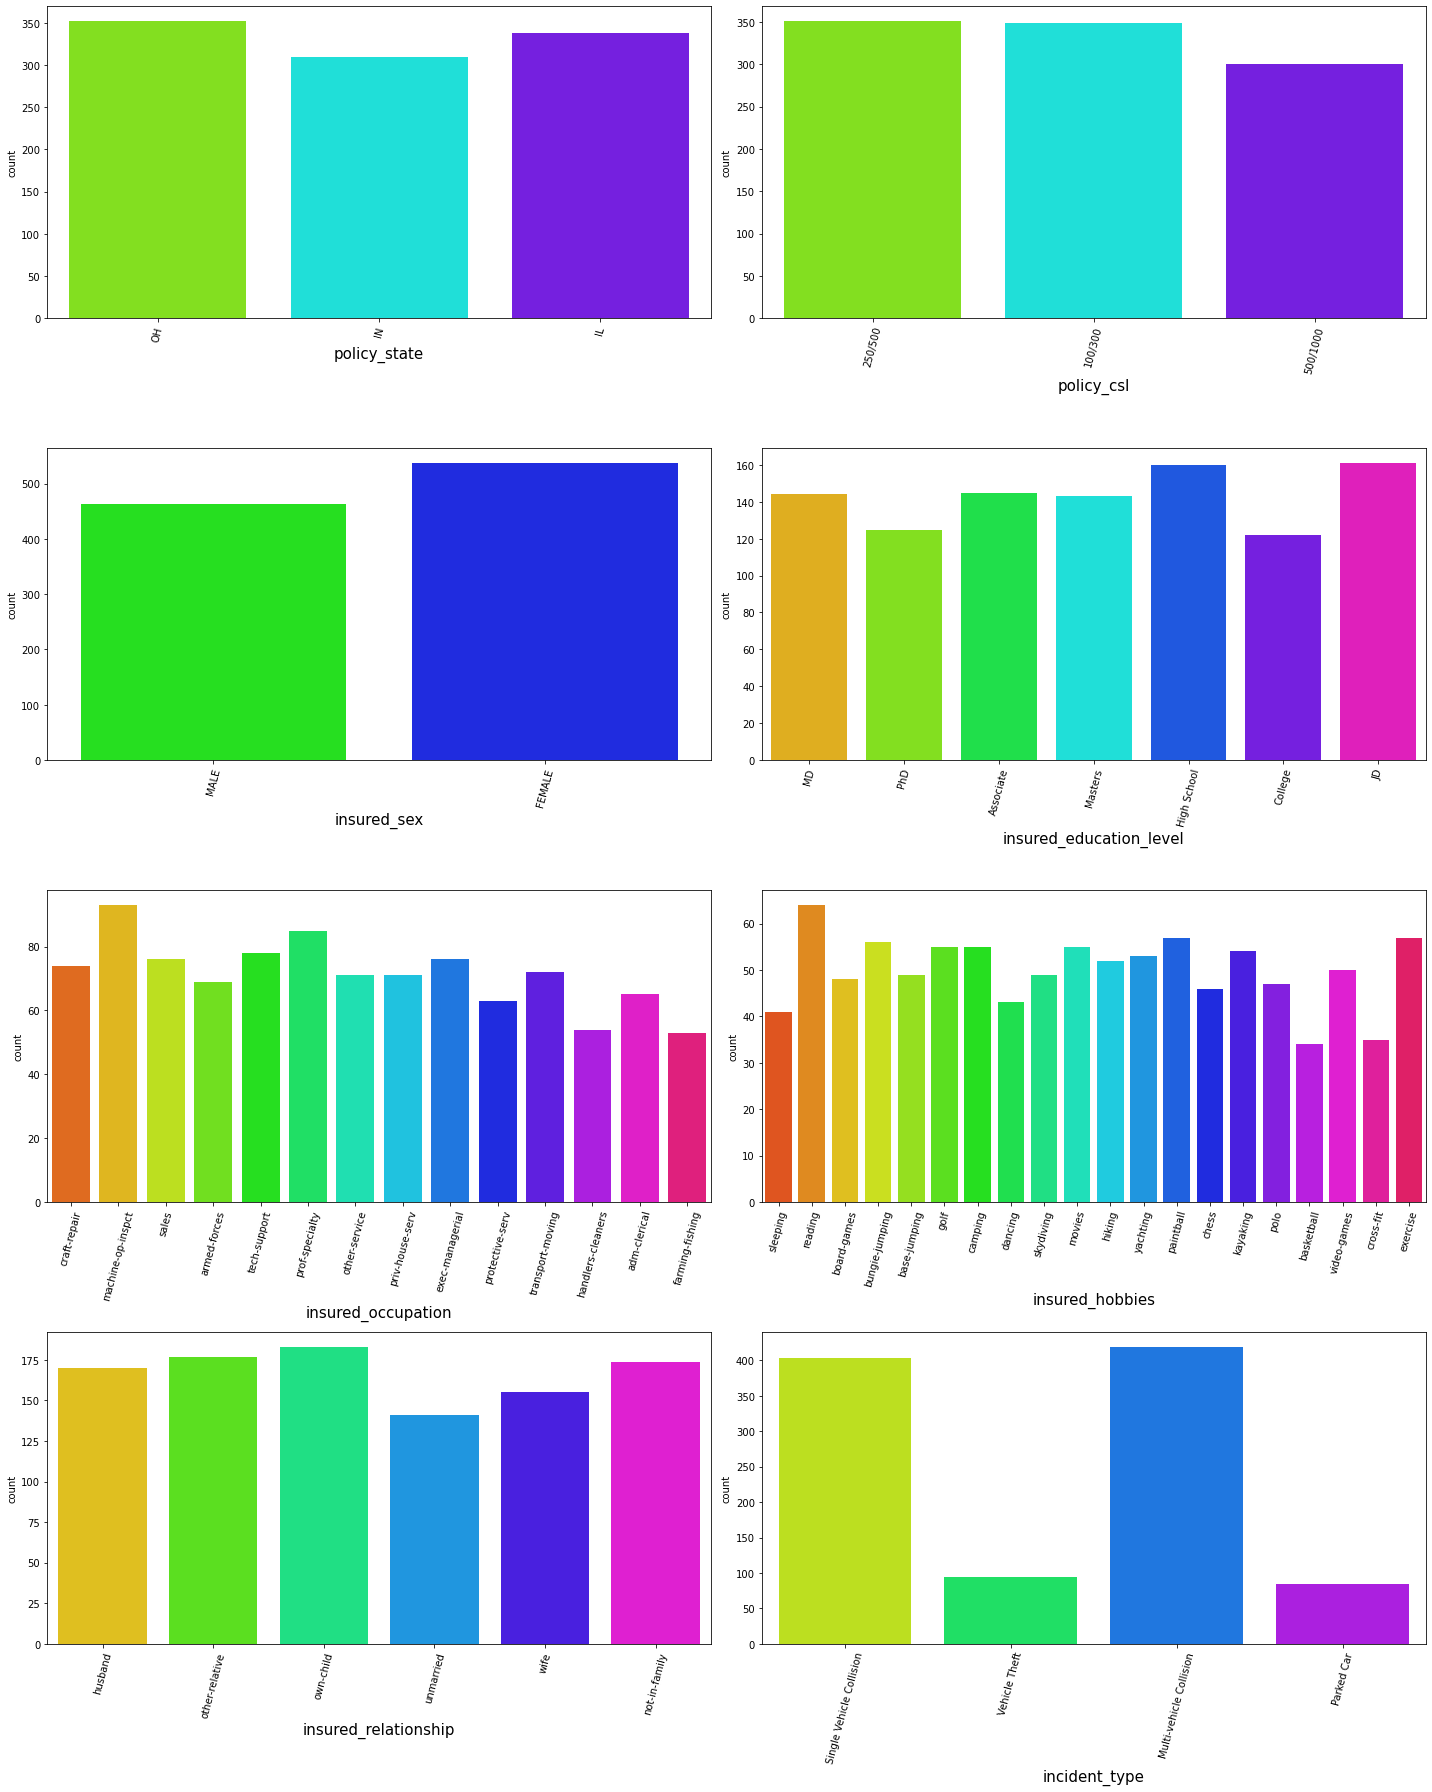

In [27]:
plt.figure(figsize=(20,25))
plotnumber=1
for col in categorical_col:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[col],palette="hsv")
        plt.xticks(rotation=75)
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()


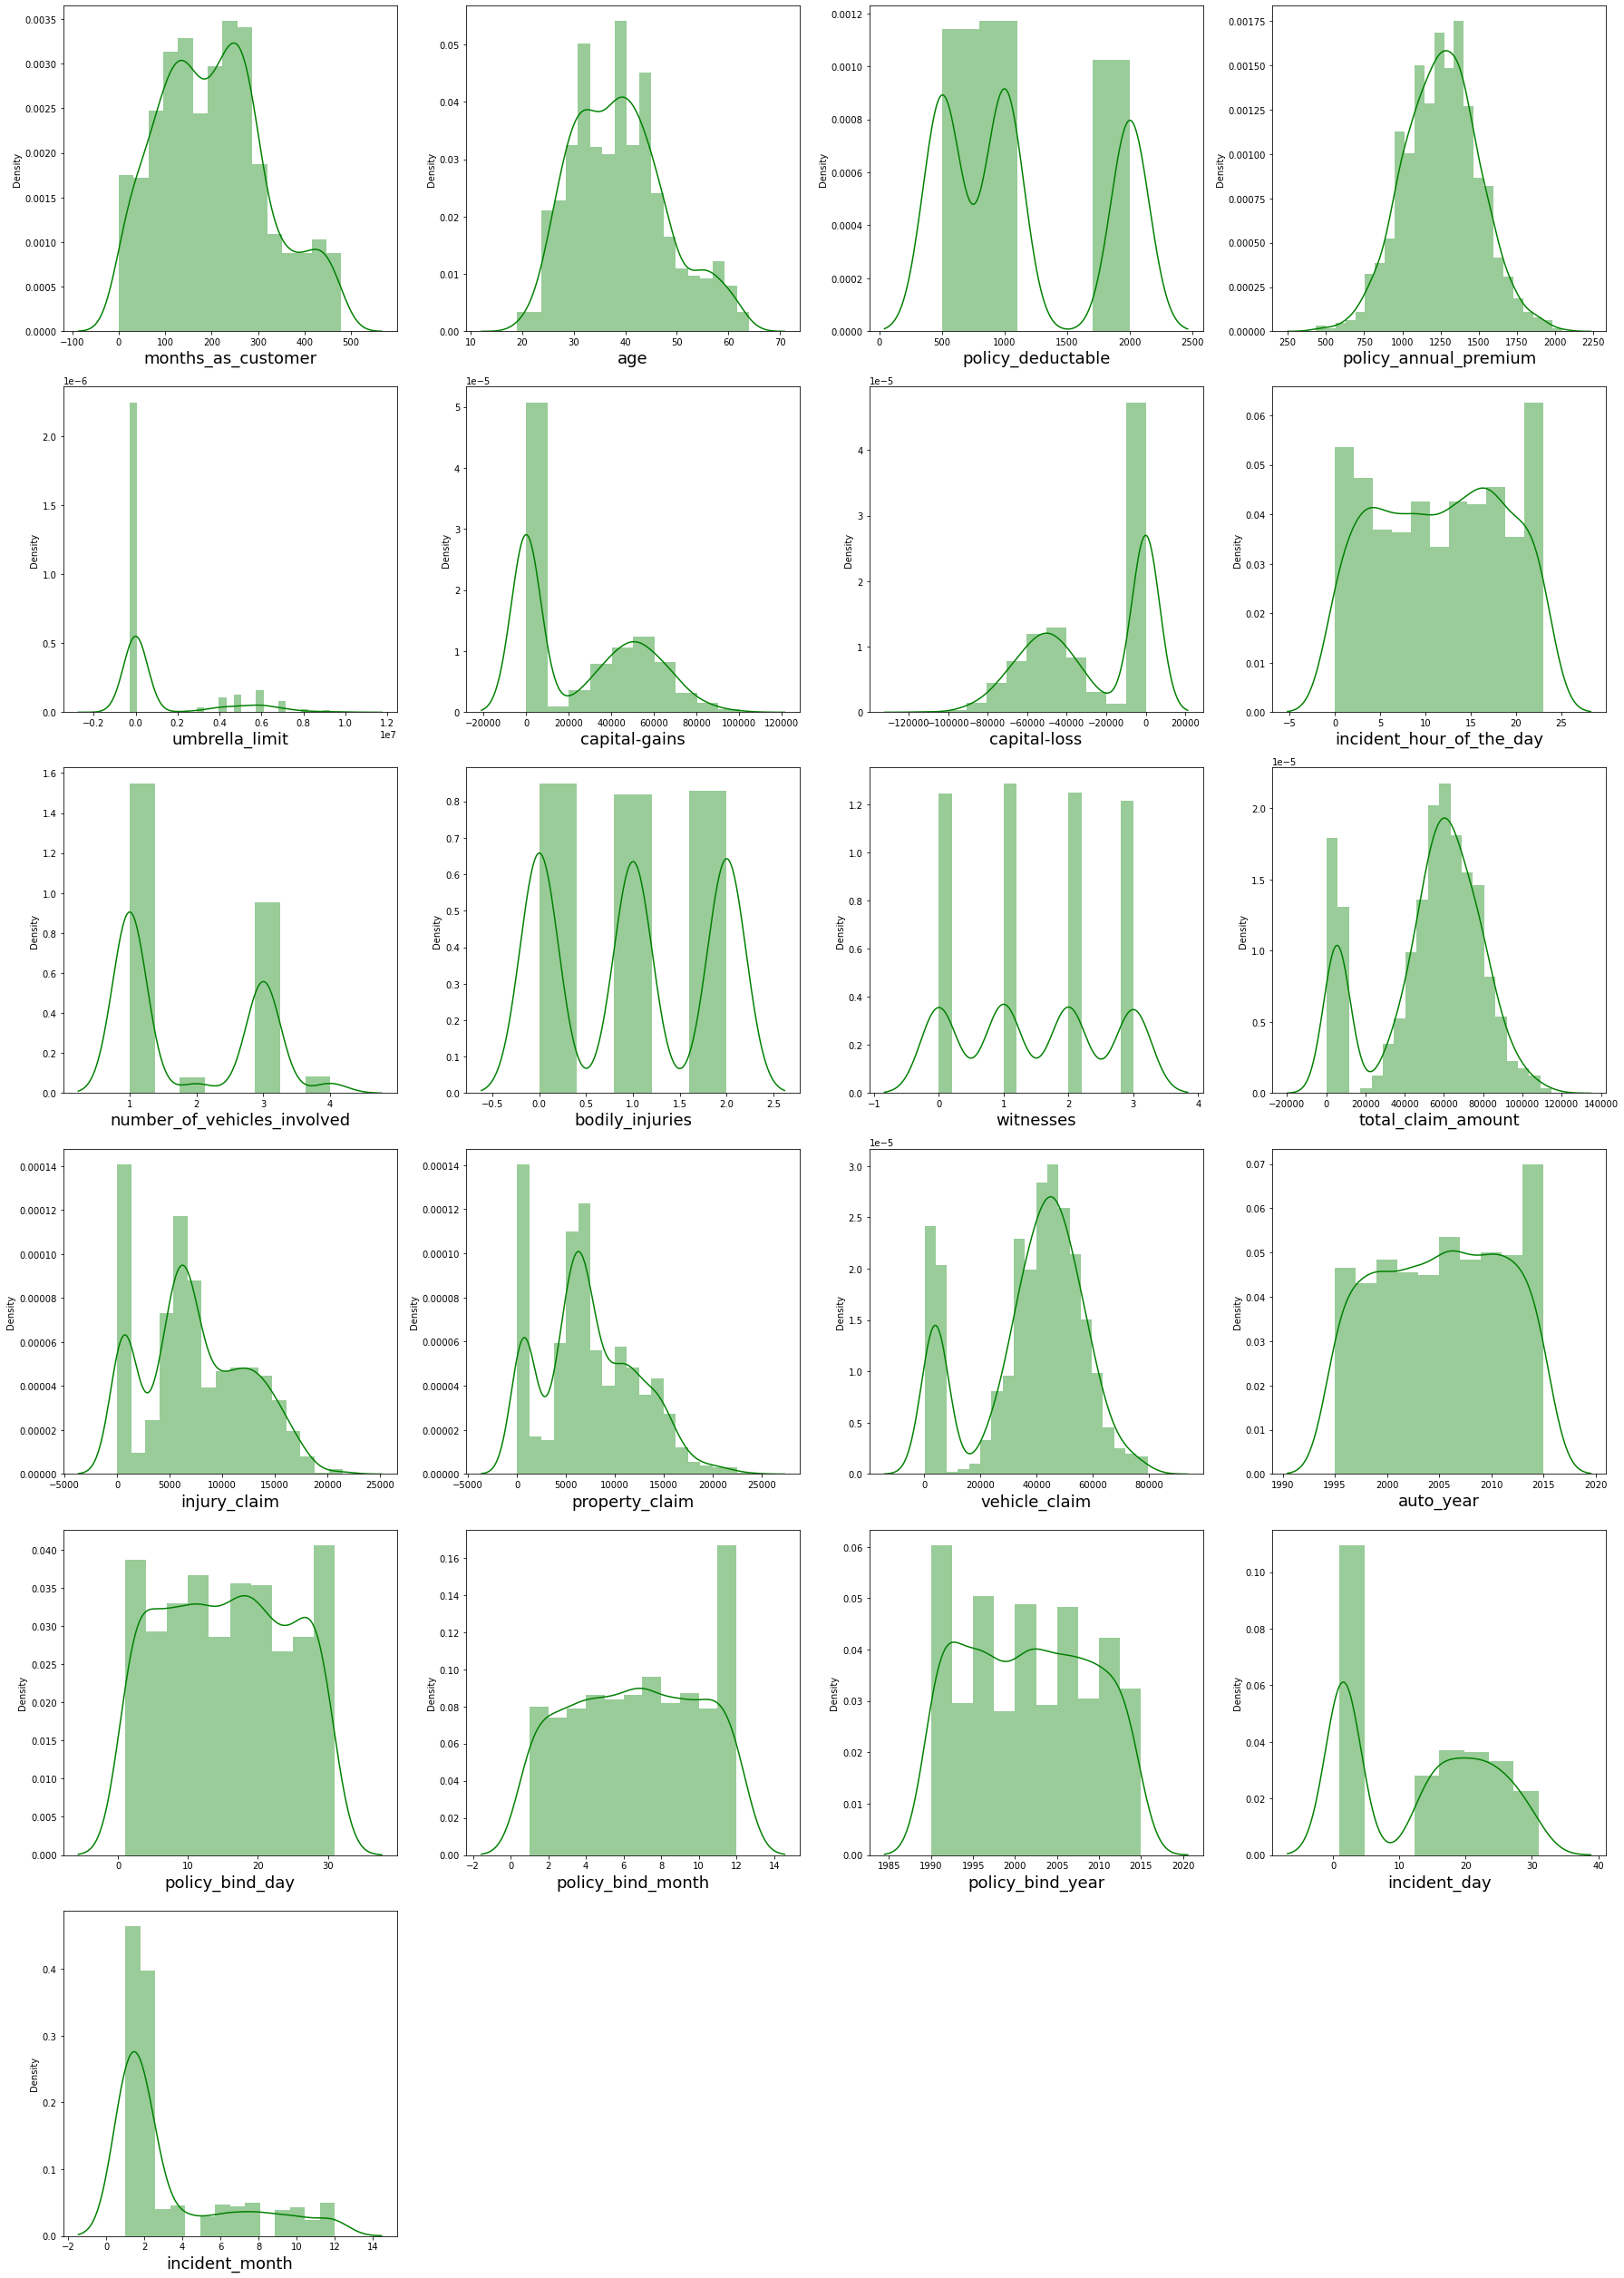

In [28]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="green")
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()


The data is normally distributed in most of the columns.

# Bivariate Analysis

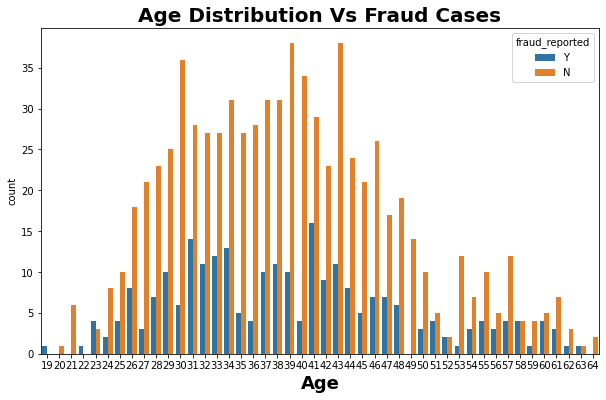

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

Maximum fraud cases comes from people with age group of 31-50 year.
Very few cases in 60+ year old peoples.

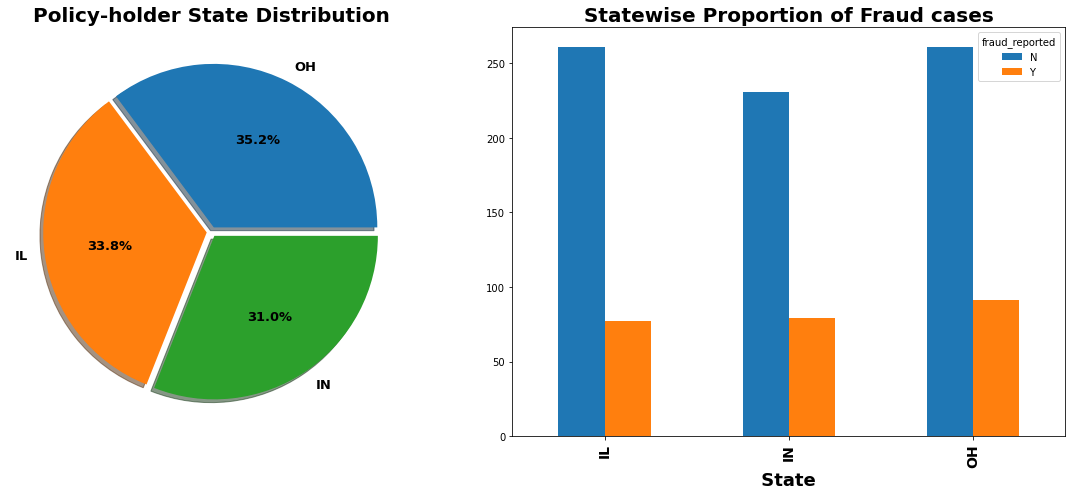

In [31]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

Fraud report is almost equal

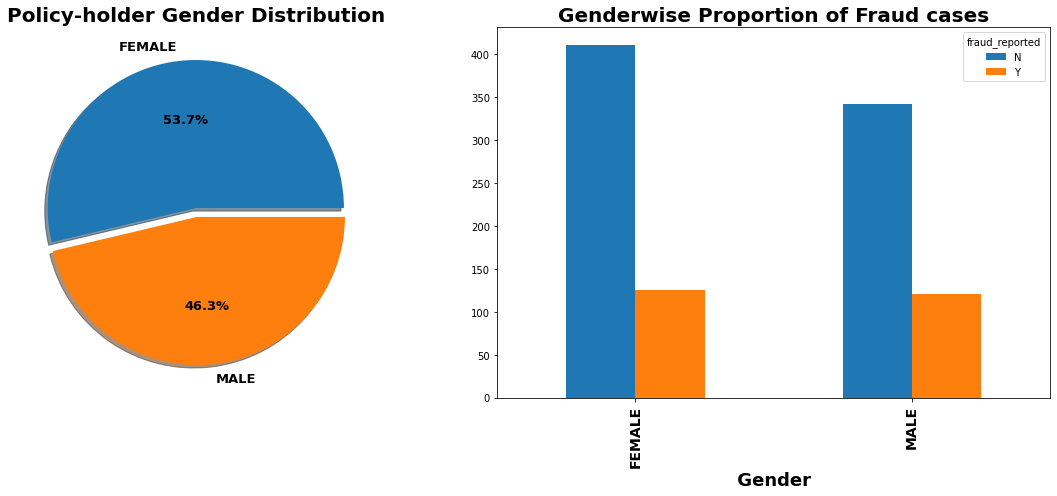

In [32]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Gender Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

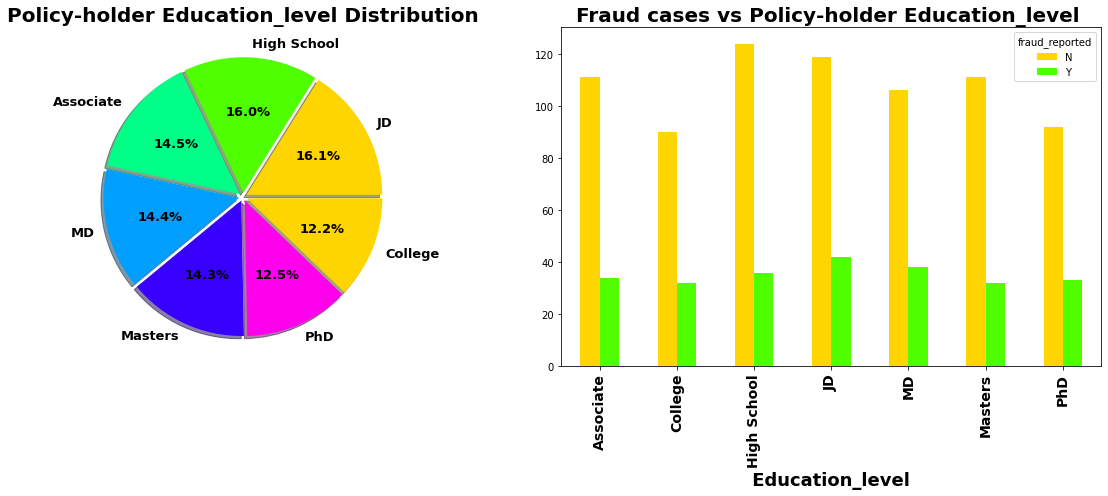

In [33]:
sns.set_palette('hsv')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

The fraudulent level is very less for the people who have high scool education and the people who have completed thier "JD" education have high fruad report.The people who have high insured education are facing insurance fruadulent compared to the people with less insured education level.

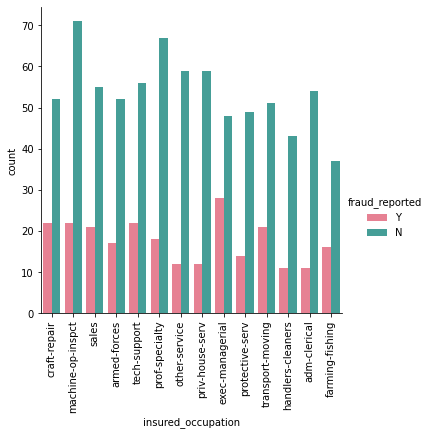

In [35]:
# Comparing insured_occupation and fraud_reported
sns.factorplot('insured_occupation',kind='count',data=df,hue='fraud_reported',palette="husl")
plt.xticks(rotation=90)
plt.show()


The people who are in the position exec-managerials have high fraud reports compared to others.

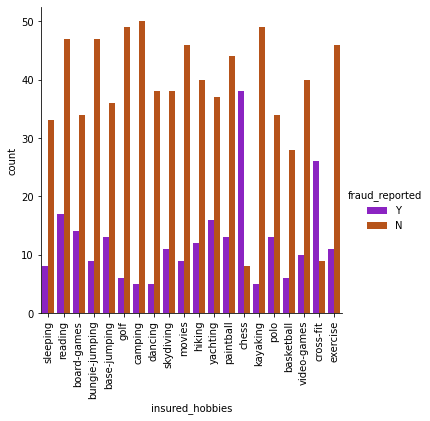

In [36]:
# Comparing insured_hobbies and fraud_reported
sns.factorplot('insured_hobbies',kind='count',data=df,hue='fraud_reported',palette='gnuplot')
plt.xticks(rotation=90)
plt.show()

The fraud report is high for the people who have the hobby of playing chess and cross fit.

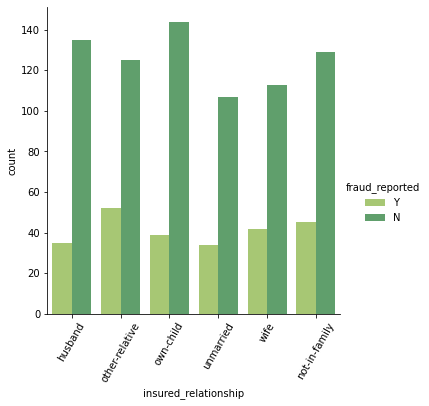

In [37]:
# Comparing insured_hobbies and fraud_reported
sns.factorplot('insured_relationship',kind='count',data=df,hue='fraud_reported',palette='summer_r')
plt.xticks(rotation=60)
plt.show()

The fraud report is high for the customers who have other relative and it is less for unmarried people.

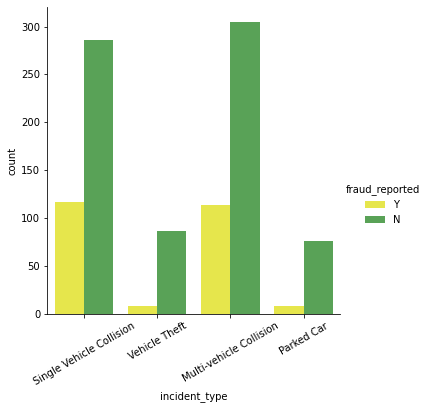

In [39]:
# Comparing incident_type and fraud_reported
sns.factorplot('incident_type',kind='count',data=df,hue='fraud_reported',palette="Set1_r")
plt.xticks(rotation=30)
plt.show()

In Multivehicle collision and single vehicle collision, the fraud report is very high compared to others.

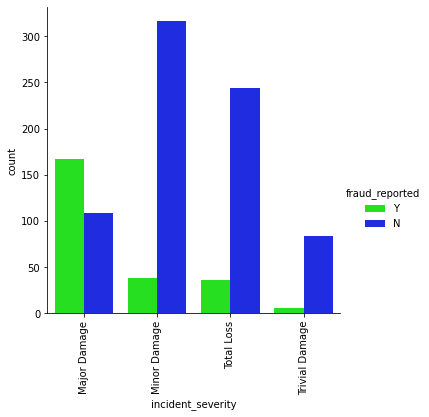

In [40]:
# Comparing incident_severity and fraud_reported
sns.factorplot('incident_severity',kind='count',data=df,hue='fraud_reported',palette="hsv")
plt.xticks(rotation=90)
plt.show()

The fraud report is high in Major damage incident severity and for Trivial Damage the report is less compared to others.

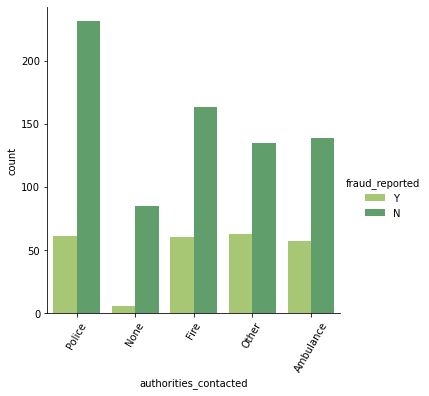

In [42]:
# Comparing authorities_contacted and fraud_reported
sns.factorplot('authorities_contacted',kind='count',data=df,hue='fraud_reported',palette="summer_r")
plt.xticks(rotation=60)
plt.show()

The police contacted cases are very high and the fraud report is in equal for all the authorities except None.

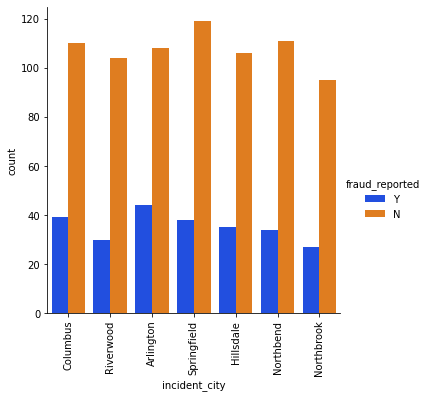

In [43]:
# Comparig incident_city and fraud_reported
sns.catplot('incident_city',kind='count',data=df,hue='fraud_reported',palette="bright")
plt.xticks(rotation=90)
plt.show()

The cities Riverwood and Northbrook have very less fraud reports compared to others.

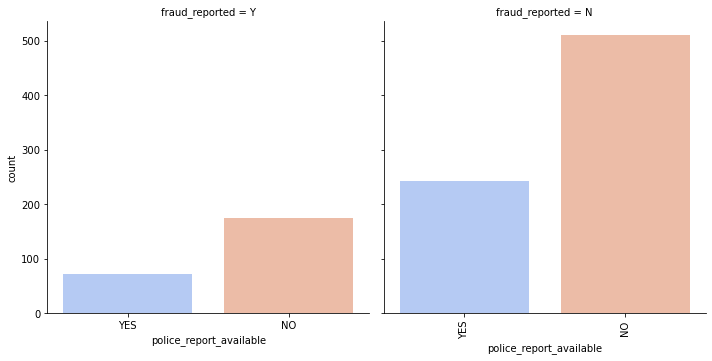

In [46]:
# Comparing police_report_available and fraud_reported
sns.factorplot('police_report_available',kind='count',data=df,col='fraud_reported',palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

If there is no police report available then the fraud report is very high

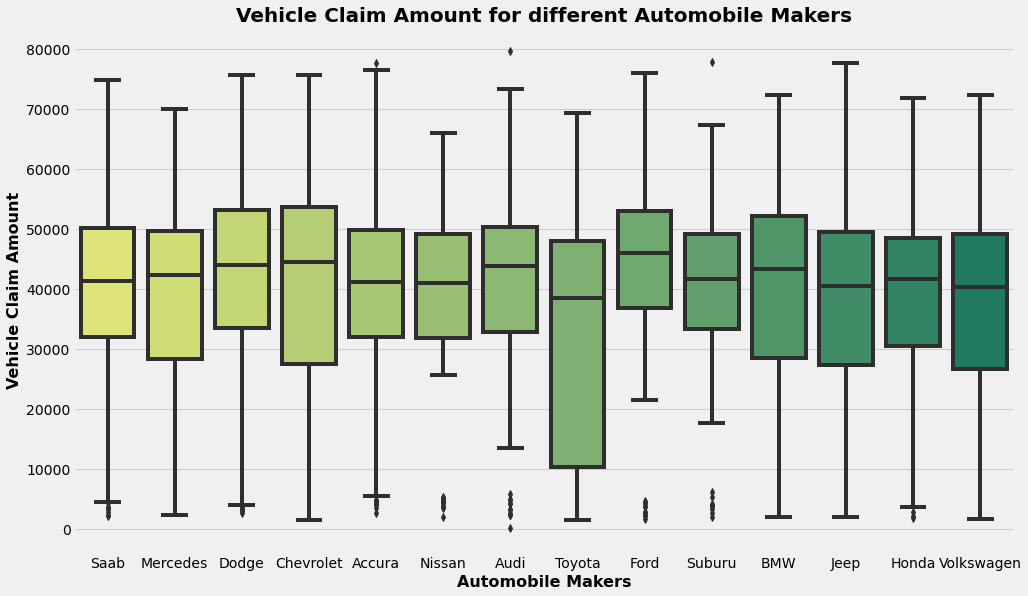

In [48]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df['auto_make'], df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

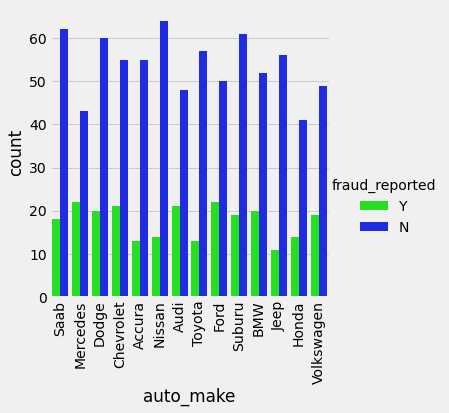

In [49]:
# Comparing auto_make and fraud_reported
sns.catplot('auto_make',kind='count',data=df,hue='fraud_reported',palette="hsv")
plt.xticks(rotation=90)
plt.show()

In all the auto make cases the fraud report is almost same

<AxesSubplot:title={'center':'Comparison between incident_severity and total_claim_amount'}, xlabel='incident_severity', ylabel='total_claim_amount'>

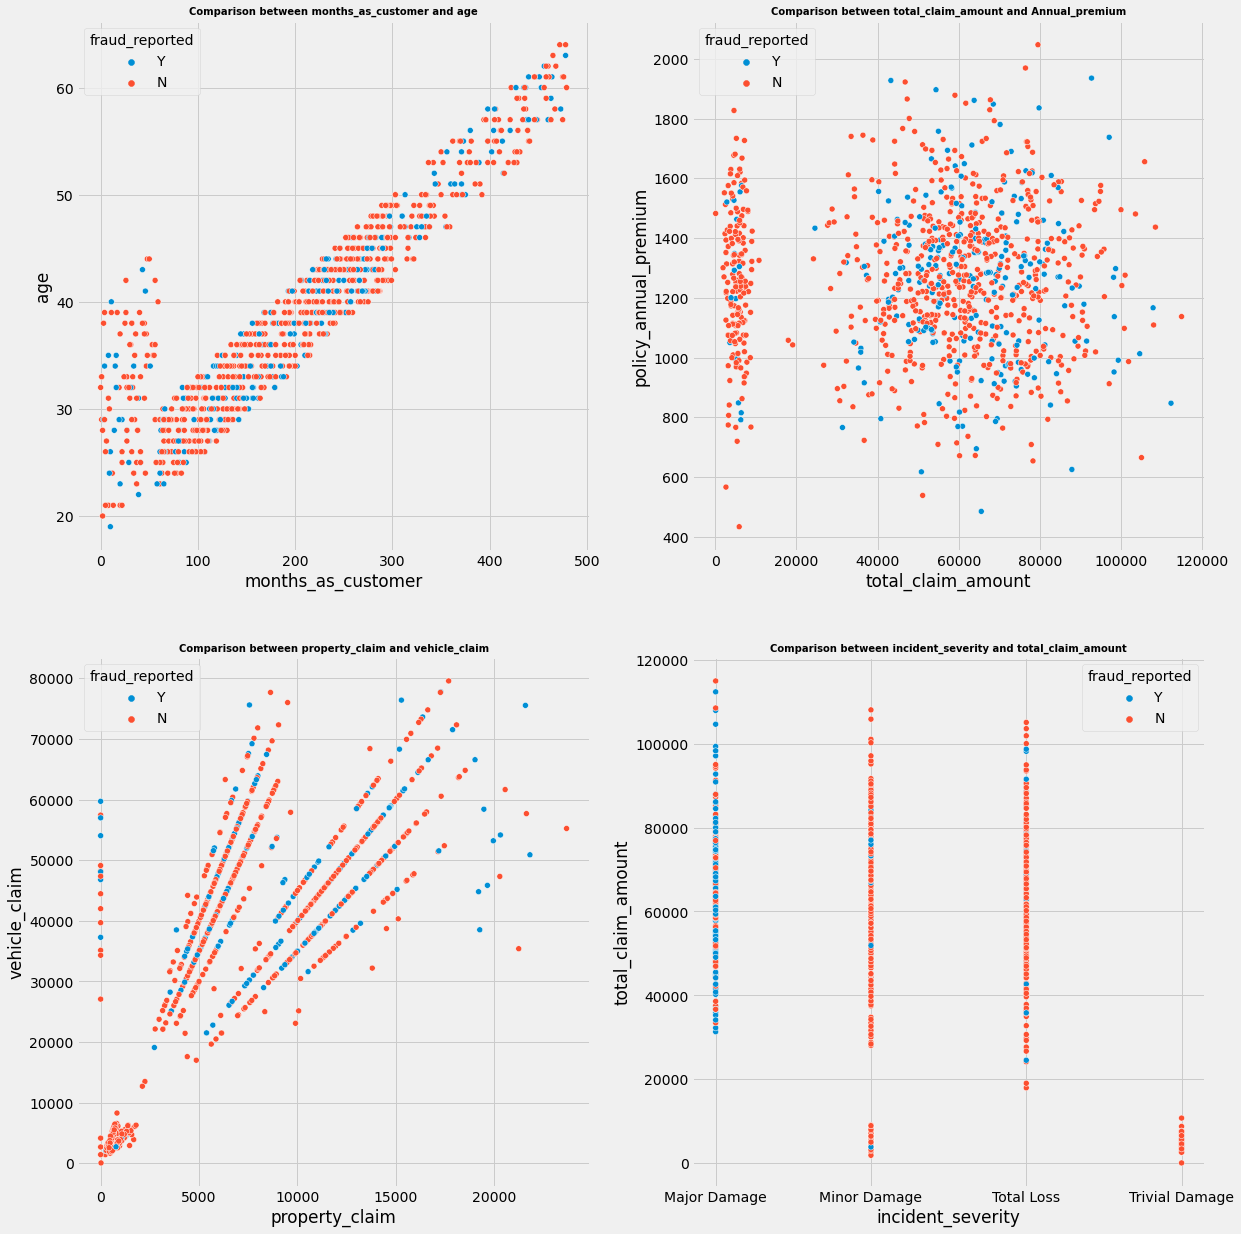

In [51]:
# Comparison between two variables
plt.figure(figsize=(18,20))
plt.subplot(2,2,1)
plt.title("Comparison between months_as_customer and age",fontweight ='bold',fontsize=10)
sns.scatterplot(df['months_as_customer'],df['age'],hue=df['fraud_reported'])

plt.subplot(2,2,2)
plt.title("Comparison between total_claim_amount and Annual_premium",fontweight ='bold',fontsize=10)
sns.scatterplot(df['total_claim_amount'],df['policy_annual_premium'],hue=df['fraud_reported'])

plt.subplot(2,2,3)
plt.title("Comparison between property_claim and vehicle_claim",fontweight ='bold',fontsize=10)
sns.scatterplot(df['property_claim'],df['vehicle_claim'],hue=df['fraud_reported'])

plt.subplot(2,2,4)
plt.title("Comparison between incident_severity and total_claim_amount",fontweight ='bold',fontsize=10)
sns.scatterplot(df['incident_severity'],df['total_claim_amount'],hue=df['fraud_reported'])

# Identifying the Outliers

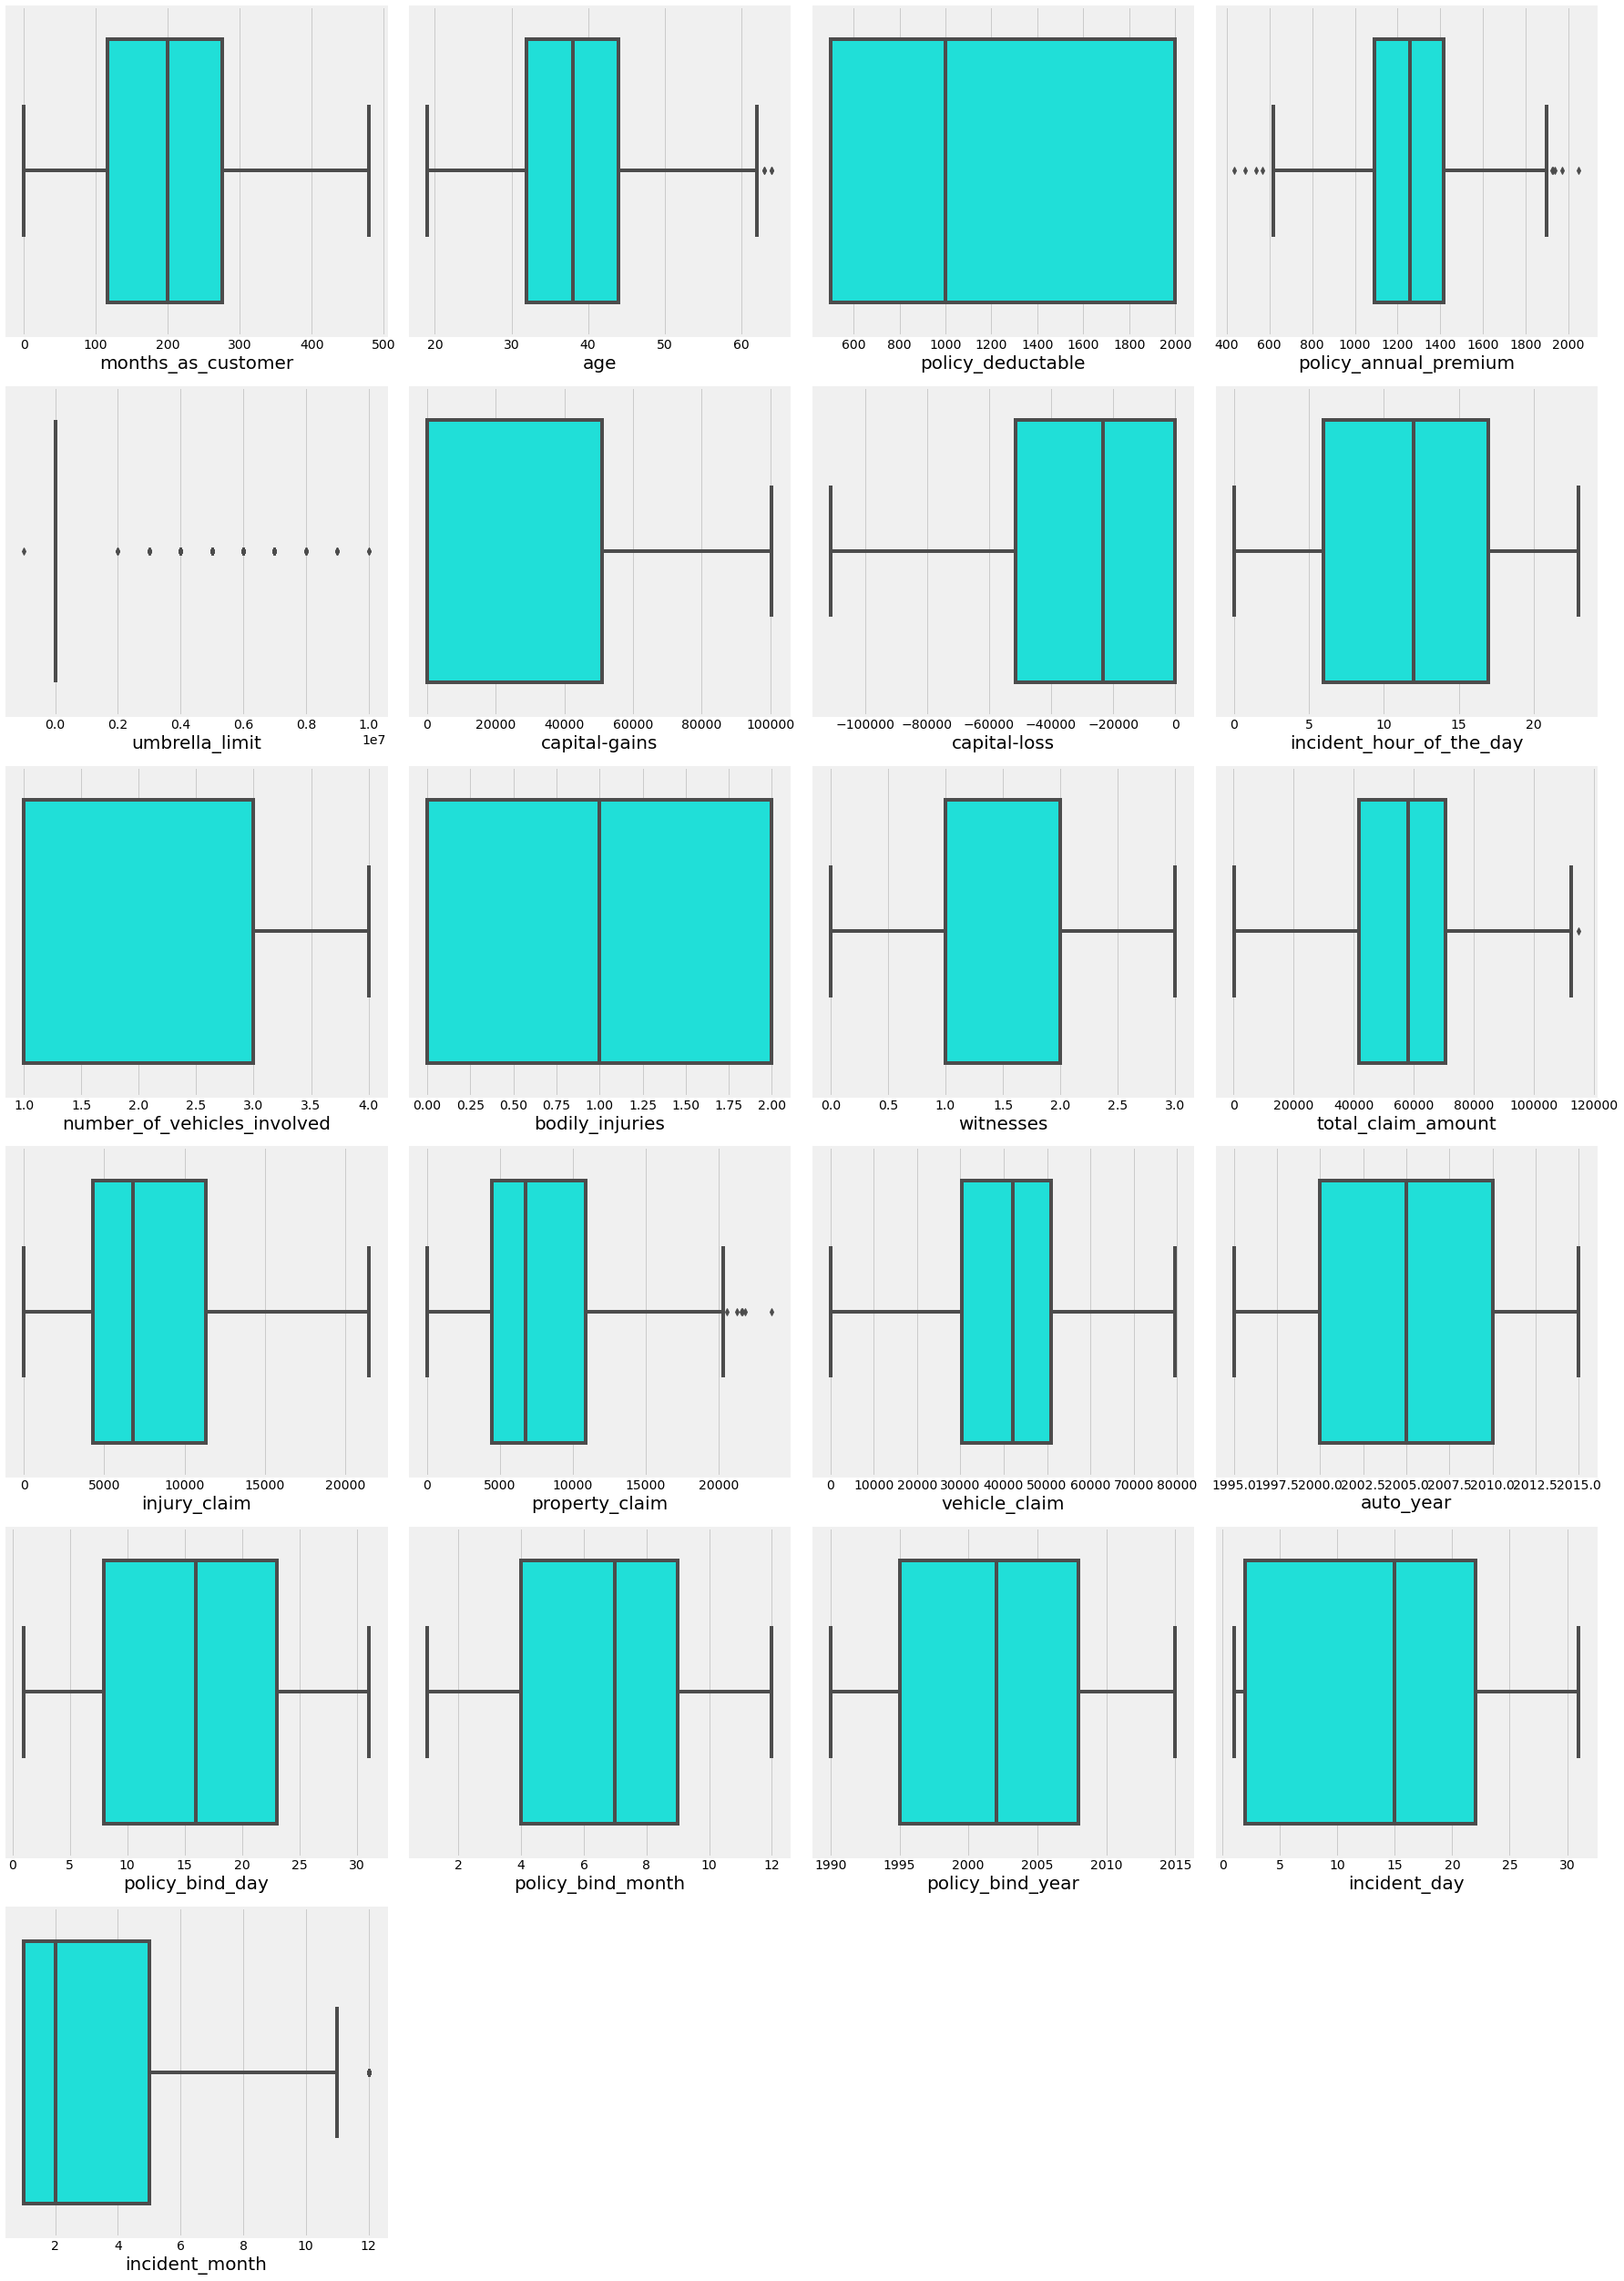

In [52]:
# Lets check the outliers by plotting boxplot
plt.figure(figsize=(25,35),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=23:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[col],palette="hsv")
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From Boxplot we can see outliers exist in dataset.

In [54]:
from scipy.stats import zscore
features = df[["age","policy_annual_premium","total_claim_amount","property_claim","incident_month","umbrella_limit"]]
z = np.abs(zscore(features))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1000, 39)
Shape of the dataframe after removing outliers:  (981, 39)
Percentage of data loss post outlier removal:  1.9


In [55]:
df[numerical_col].skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount            -0.595242
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.622528
auto_year                     -0.054033
policy_bind_day                0.026657
policy_bind_month             -0.025056
policy_bind_year               0.062986
incident_day                   0.057403
incident_month                 1.389884
dtype: float64

In [56]:
skew=['total_claim_amount','vehicle_claim','umbrella_limit','number_of_vehicles_involved','incident_month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [57]:
df[skew].skew()

total_claim_amount            -0.508980
vehicle_claim                 -0.522130
umbrella_limit                -7.939425
number_of_vehicles_involved    0.370496
incident_month                 0.306126
dtype: float64

The skewness is almost reduced in all the columns except umbrella limit col as it contain more than 50% data of 0. so we will keep it

In [59]:
#Encoding the catgorical data
from sklearn.preprocessing import LabelEncoder

lbl=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(lbl.fit_transform)

In [60]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,2,1,1000,1406.91,-0.336839,1,4,2,...,0.757816,10,1,2004,1,17,10,2014,25,-1.101290
1,228,42,1,1,2000,1197.22,1.483266,1,4,6,...,-1.788203,8,12,2007,1,27,6,2006,21,-1.101290
2,134,29,2,0,2000,1413.14,1.483266,0,6,11,...,-0.821553,4,30,2007,0,9,6,2000,22,-0.021758
3,256,41,0,1,2000,1415.74,1.789387,0,6,1,...,0.681441,3,34,2014,1,25,5,1990,1,1.557856
4,228,44,0,2,1000,1583.91,1.789387,1,0,11,...,-1.741666,0,31,2009,0,6,6,2014,17,-0.021758


In [61]:
#Corrleation
df.corr()


,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
months_as_customer,1.000000,0.922960,-0.007179,-0.021865,0.030777,-0.003875,-0.001591,0.059770,-0.000735,0.006786,...,0.056256,0.049912,0.005350,0.001145,0.021375,0.050537,0.004185,-0.042040,-0.010356,0.015392
age,0.922960,1.000000,-0.020009,-0.013330,0.031851,0.005290,0.001445,0.073857,0.001645,0.014703,...,0.059056,0.033873,0.015456,0.005767,0.013338,0.052939,0.014477,-0.031790,-0.005724,0.014692
policy_state,-0.007179,-0.020009,1.000000,0.001651,0.017559,0.015079,-0.031679,-0.017970,-0.027173,-0.025369,...,-0.006424,0.010283,-0.017956,-0.001116,0.034595,-0.000618,0.073689,-0.003066,0.016067,0.027477
policy_csl,-0.021865,-0.013330,0.001651,1.000000,0.009999,0.032677,0.033579,-0.003467,0.008339,0.016512,...,-0.042663,-0.009480,0.042770,-0.030441,-0.032542,0.013651,-0.041274,-0.019342,-0.002349,-0.046406
policy_deductable,0.030777,0.031851,0.017559,0.009999,1.000000,-0.007754,0.029543,-0.008308,0.014117,-0.052613,...,0.005720,-0.029963,-0.004556,0.028073,0.014936,0.015411,-0.053964,-0.052713,-0.019618,-0.002946
policy_annual_premium,-0.003875,0.005290,0.015079,0.032677,-0.007754,1.000000,-0.016924,0.040936,-0.021390,0.028133,...,0.009414,0.008776,-0.038708,-0.043022,-0.012900,-0.032105,-0.031555,0.002764,0.018253,-0.013819
umbrella_limit,-0.001591,0.001445,-0.031679,0.033579,0.029543,-0.016924,1.000000,-0.007517,0.007837,0.006408,...,-0.070521,0.028656,0.001282,0.051259,0.046260,0.000127,0.013917,0.055883,-0.056052,0.054071
insured_sex,0.059770,0.073857,-0.017970,-0.003467,-0.008308,0.040936,-0.007517,1.000000,0.010044,-0.008228,...,-0.024160,0.021281,-0.017329,-0.031674,0.021111,0.046269,-0.003249,-0.032032,-0.016178,0.036656
insured_education_level,-0.000735,0.001645,-0.027173,0.008339,0.014117,-0.021390,0.007837,0.010044,1.000000,-0.025367,...,0.072648,0.059955,0.042665,0.054323,0.013102,0.018987,-0.011960,0.016886,-0.051765,0.064526
insured_occupation,0.006786,0.014703,-0.025369,0.016512,-0.052613,0.028133,0.006408,-0.008228,-0.025367,1.000000,...,0.003097,0.043096,0.013966,-0.000520,-0.000208,0.004582,0.020795,-0.025706,-0.021453,0.010360


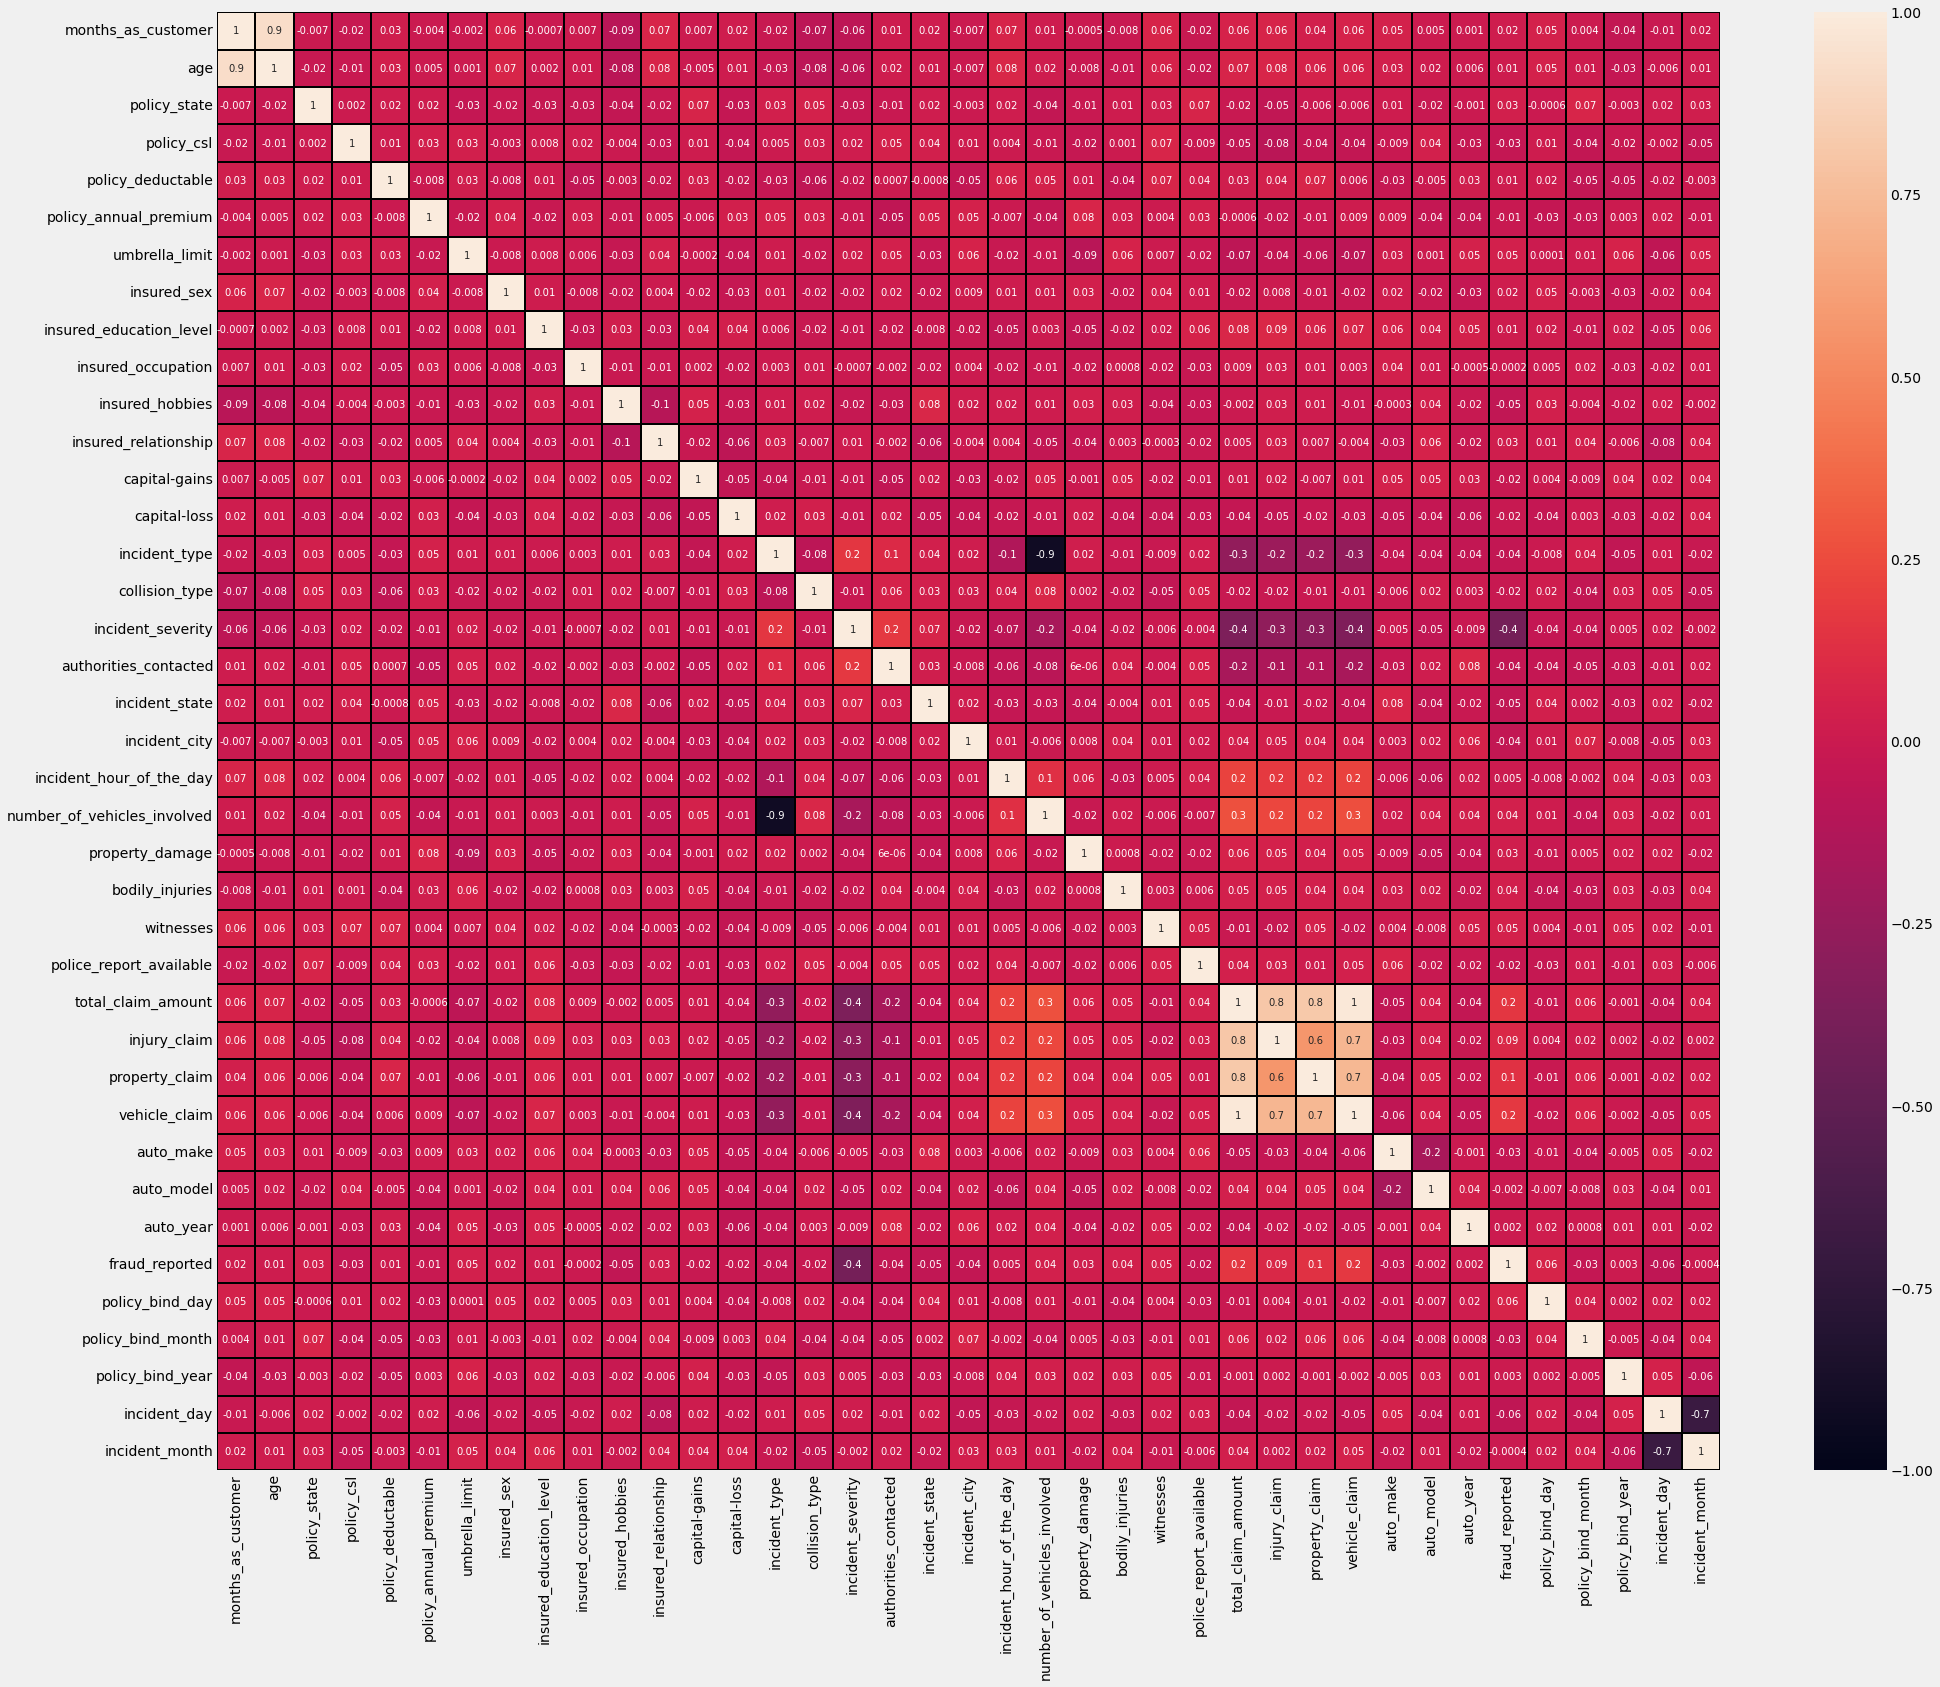

In [63]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10})
plt.yticks(rotation=0);

There is very less correlation between the target and the label.
We can observe the most of the columns are highly correlated with each other which leads to the multicollinearity problem.
We will check the VIF value to overcome with this multicollinearity problem.

In [64]:
#Separating features and label
x = df.drop("fraud_reported", axis=1)
y = df["fraud_reported"]

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,1.070264,0.983956,1.180447,0.067197,-0.225968,0.619923,-0.336839,1.072994,0.533151,-1.157117,...,1.174939,0.757816,0.852973,-1.638317,-0.186701,0.173153,1.013847,1.682477,1.143669,-1.101290
1,0.202991,0.329985,-0.024567,0.067197,1.410009,-0.248937,1.483266,1.072994,0.533151,-0.161169,...,-1.379994,-1.788203,0.356523,-0.650052,0.311903,1.306330,-0.162827,0.599465,0.759608,-1.101290
2,-0.612245,-1.086951,1.180447,-1.176582,1.410009,0.645737,1.483266,-0.931972,1.557678,1.083766,...,-0.739173,-0.821553,-0.636377,0.967110,0.311903,-0.733389,-0.162827,-0.212794,0.855623,-0.021758
3,0.445828,0.220990,-1.229581,0.067197,1.410009,0.656510,1.789387,-0.931972,1.557678,-1.406105,...,-0.219420,0.681441,-0.884602,1.326479,1.475311,1.079695,-0.456996,-1.566559,-1.160699,1.557856
4,0.202991,0.547975,-1.229581,1.310976,-0.225968,1.353331,1.789387,1.072994,-1.515903,1.083766,...,-1.407130,-1.741666,-1.629278,1.056952,0.644305,-1.073342,-0.162827,1.682477,0.375546,-0.021758


In [67]:
#Balancing using SMOTE
from imblearn.over_sampling import SMOTE

In [68]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [70]:
y.value_counts()

1    741
0    741
Name: fraud_reported, dtype: int64

In [71]:
# Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,7.806395,months_as_customer
1,7.845502,age
2,1.058176,policy_state
3,1.063743,policy_csl
4,1.063264,policy_deductable
5,1.053796,policy_annual_premium
6,1.051287,umbrella_limit
7,1.049439,insured_sex
8,1.061076,insured_education_level
9,1.038501,insured_occupation


We can see some columns have vif values above 10 that meand they are causing multicolinerity problem. Lets drop the features having high VIF value.

In [72]:
# Dropping total_claim_amount column 
X.drop(['total_claim_amount'],axis=1,inplace=True)

In [73]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,7.786996,months_as_customer
1,7.842555,age
2,1.058139,policy_state
3,1.063483,policy_csl
4,1.062974,policy_deductable
5,1.051572,policy_annual_premium
6,1.050812,umbrella_limit
7,1.047360,insured_sex
8,1.060965,insured_education_level
9,1.037712,insured_occupation


Now the multicolineraity problem has been resolved.

# Machine Learning Model Building

In [76]:
#Finding best random state:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,500):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.7910112359550562  on Random_State  232


In [77]:
#Creating train_test Split:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=232)

# RandomForestClassifier

In [79]:
# checking accuracy for RandomForestclasifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

score = cross_val_score(RFC,X,y)
print('cross vallidation sccore is - ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation mean score is - ",accuracy_score(y_test,predRFC)-score.mean())

Acurracy score is-  0.8674157303370786
[[192  28]
 [ 31 194]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       220
           1       0.87      0.86      0.87       225

    accuracy                           0.87       445
   macro avg       0.87      0.87      0.87       445
weighted avg       0.87      0.87      0.87       445

cross vallidation sccore is -  [0.72390572 0.85185185 0.93581081 0.92905405 0.93918919]
CV mean score is -  0.8759623259623259
Difference between Accracy score and cross validation mean score is -  -0.008546595625247289


# Support Vector Machine Classifier

In [80]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


score = cross_val_score(svc,X,y)
print('cross validation score is- ',score)
print('cv mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predsvc)-score.mean())

Acurracy score is-  0.8786516853932584
[[197  23]
 [ 31 194]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       220
           1       0.89      0.86      0.88       225

    accuracy                           0.88       445
   macro avg       0.88      0.88      0.88       445
weighted avg       0.88      0.88      0.88       445

cross validation score is-  [0.80808081 0.86868687 0.875      0.89864865 0.91554054]
cv mean score is -  0.8731913731913732
Difference between Accracy score and cross validation score is -  0.0054603122018852535


# Gradient Boosting Classifier

In [81]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

score = cross_val_score(GB,X,y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predGB)-score.mean())

Acurracy score is-  0.8786516853932584
[[188  32]
 [ 22 203]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       220
           1       0.86      0.90      0.88       225

    accuracy                           0.88       445
   macro avg       0.88      0.88      0.88       445
weighted avg       0.88      0.88      0.88       445

cross validation score is-  [0.76430976 0.85521886 0.91891892 0.91216216 0.93243243]
CV mean score is -  0.8766084266084266
Difference between Accracy score and cross validation score is -  0.002043258784831803


# AdaBoost Classifier

In [83]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

score = cross_val_score(ABC,X,y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predABC)-score.mean())

Acurracy score is-  0.8539325842696629
[[191  29]
 [ 36 189]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       220
           1       0.87      0.84      0.85       225

    accuracy                           0.85       445
   macro avg       0.85      0.85      0.85       445
weighted avg       0.85      0.85      0.85       445

cross validation score is-  [0.63973064 0.75420875 0.91891892 0.93243243 0.93243243]
CV mean score is -  0.8355446355446355
Difference between Accracy score and cross validation score is -  0.01838794872502736


# BaggingClassifier

In [84]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

score = cross_val_score(BC,X,y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predBC)-score.mean())

Acurracy score is-  0.8539325842696629
[[191  29]
 [ 36 189]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       220
           1       0.87      0.84      0.85       225

    accuracy                           0.85       445
   macro avg       0.85      0.85      0.85       445
weighted avg       0.85      0.85      0.85       445

cross validation score is-  [0.77777778 0.85858586 0.88513514 0.88175676 0.92567568]
CV mean score is -  0.8657862407862407
Difference between Accracy score and cross validation score is -  -0.01185365651657777


# Extra TreeClassifier

In [85]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

score = cross_val_score(ET,X,y)
print('cross validation score is- ',score)
print('cv mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predET)-score.mean())

Acurracy score is-  0.903370786516854
[[195  25]
 [ 18 207]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       220
           1       0.89      0.92      0.91       225

    accuracy                           0.90       445
   macro avg       0.90      0.90      0.90       445
weighted avg       0.90      0.90      0.90       445

cross validation score is-  [0.84511785 0.8956229  0.93918919 0.94932432 0.9527027 ]
cv mean score is -  0.9163913913913915
Difference between Accracy score and cross validation score is -  -0.01302060487453749


# DecisionTreeClassifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT = DT.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

score = cross_val_score(DT,X,y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predDT)-score.mean())

Acurracy score is-  0.8179775280898877
[[178  42]
 [ 39 186]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       220
           1       0.82      0.83      0.82       225

    accuracy                           0.82       445
   macro avg       0.82      0.82      0.82       445
weighted avg       0.82      0.82      0.82       445

cross validation score is-  [0.7037037  0.79461279 0.87837838 0.89189189 0.90202703]
CV mean score is -  0.8341227591227591
Difference between Accracy score and cross validation score is -  -0.016145231032871465


# KNeighborsClassifier

In [87]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN = KNN.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

score = cross_val_score(KNN,X,y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predKNN)-score.mean())

Acurracy score is-  0.6674157303370787
[[ 82 138]
 [ 10 215]]
              precision    recall  f1-score   support

           0       0.89      0.37      0.53       220
           1       0.61      0.96      0.74       225

    accuracy                           0.67       445
   macro avg       0.75      0.66      0.63       445
weighted avg       0.75      0.67      0.64       445

cross validation score is-  [0.60942761 0.64983165 0.66216216 0.69932432 0.69256757]
CV mean score is -  0.6626626626626626
Difference between Accracy score and cross validation score is -  0.004753067674416078


# Best Model

based on the above models we can see that differnce between accuracy score and cross val score is quite less in extra tree and accuracy is 90% so our best model is Extra tree

# Hyper parameter tuning

In [88]:
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [90]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter)
GCV.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]})

In [91]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 300}

In [95]:
#Final Model
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 400, max_depth=20 ,
                                 min_samples_split= 3, max_features= 'sqrt')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))

Accuracy Score :
 0.9191011235955057


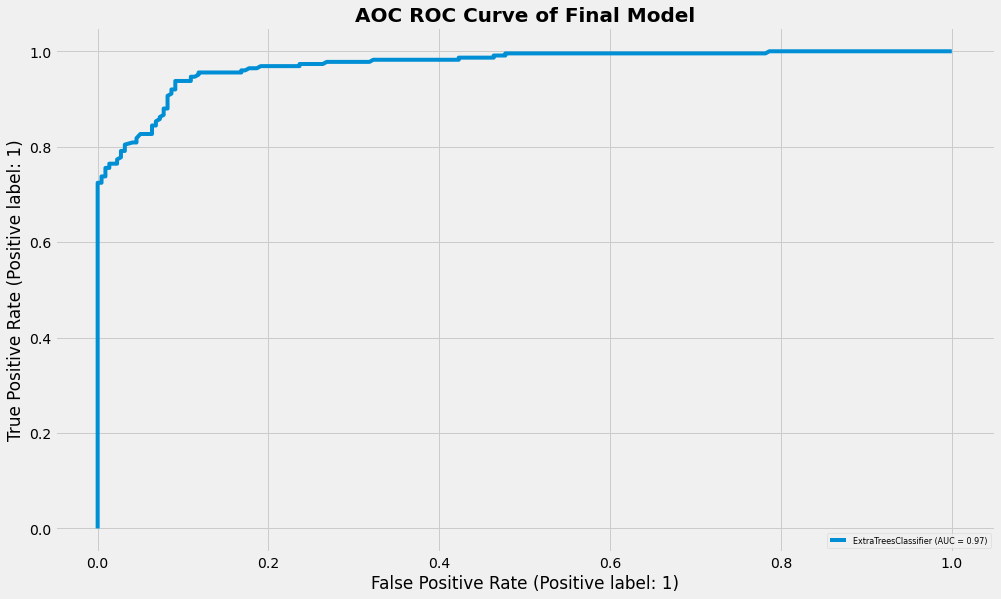

Auc Score :
 0.918989898989899


In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,x_test,y_test)   
plt.legend(prop={'size':8}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(y_test, Final_mod.predict(x_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [99]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.pkl')

['Insurance_claims_Final.pkl']

# Predicting the saved model

In [100]:
# Prediction
prediction = Final_mod.predict(x_test)

Actual = np.array(y_test)

df_Pred = pd.DataFrame()

df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
